In [13]:
import pandas as pd

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Individual_t104.dta to Individual_t104.dta


In [16]:
from google.colab import files
uploaded = files.upload()

Saving usu_individual_T124.xlsx to usu_individual_T124.xlsx


In [17]:
df_2004 = pd.read_stata("Individual_t104.dta")
df_2024 = pd.read_excel("usu_individual_T124.xlsx")
print(df_2004.head())
print(df_2024.head())

     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              06      06              04   0.0   0.0   0.0  00000  
1       

In [18]:
df_2004["region"].unique()

['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']

In [19]:
#punto 2a
df_2004_gba = df_2004[df_2004["region"] == "Gran Buenos Aires"]
df_2024_gba = df_2024[df_2024["REGION"] == "Gran Buenos Aires"]


In [20]:
df_a = pd.read_stata("Individual_t104.dta")
print(df_a.shape)
df_b = pd.read_excel("usu_individual_T124.xlsx")
print(df_b.shape)
df_a_gba = df_a[df_a["region"] == "Gran Buenos Aires"]
df_b_gba = df_b[df_b["REGION"] == "Gran Buenos Aires"]
df = pd.concat([df_a_gba, df_b_gba])
print(df.shape)

(45289, 176)
(46050, 177)
(7647, 352)


In [21]:
#punto 2b
variables_2004=['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'deccfr',
 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr', 'pj1_1', 'pj2_1', 'pj3_1', 'idimpp']
variables_2024= ['GDECCFR' , 'PDECCFR','CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE',
                 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05']
faltantes_2004=df_a[variables_2004].isna().sum()
faltantes_2024=df_b[variables_2024].isna().sum()

In [24]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

valores_invalidos = [9, 99, 999, 99999, -7, -8, -9, 0]

import numpy as np

for var in variables_2024:
    df[var] = df[var].replace(valores_invalidos, np.nan)

faltantes_limpios = df[variables_2024].isna().sum()
print("Valores faltantes después de limpieza(2024):")
print(faltantes_limpios)

for var in variables_2004:
    df[var] = df[var].replace(valores_invalidos, np.nan)

faltantes_limpios = df[variables_2004].isna().sum()
print("Valores faltantes después de limpieza(2004):")
print(faltantes_limpios)

Valores faltantes después de limpieza(2024):
GDECCFR       7647
PDECCFR       7647
CODUSU           0
ANO4          7647
TRIMESTRE     7647
NRO_HOGAR     7647
COMPONENTE    7647
H15           7647
REGION        7647
MAS_500       7647
AGLOMERADO    7647
PONDERA       7647
CH03          7647
CH04          7647
CH05          7647
dtype: int64
Valores faltantes después de limpieza(2004):
CODUSU           0
nro_hogar        0
componente      35
h15           1230
ano4             0
deccfr           0
ideccfr          0
rdeccfr          0
gdeccfr          0
pdeccfr          0
adeccfr          0
pj1_1         7488
pj2_1         7595
pj3_1         7613
idimpp           0
dtype: int64


<ipython-input-24-2bc626974f18>:16: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[var] = df[var].replace(valores_invalidos, np.nan)


In [25]:
print("valores faltantes - año 2004")
print(faltantes_2004)
print("valores faltantes - año 2024")
print(faltantes_2024)

valores faltantes - año 2004
CODUSU        0
nro_hogar     0
componente    0
h15           0
ano4          0
deccfr        0
ideccfr       0
rdeccfr       0
gdeccfr       0
pdeccfr       0
adeccfr       0
pj1_1         0
pj2_1         0
pj3_1         0
idimpp        0
dtype: int64
valores faltantes - año 2024
GDECCFR       24408
PDECCFR       21642
CODUSU            0
ANO4              0
TRIMESTRE         0
NRO_HOGAR         0
COMPONENTE        0
H15               0
REGION            0
MAS_500           0
AGLOMERADO        0
PONDERA           0
CH03              0
CH04              0
CH05              0
dtype: int64


In [26]:
#punto 2c
valores_invalidos = [9, 99, 999, 99999, -7, -8, -9, 0]
import numpy as np
for var in variables_2024:
    df[var] = df[var].replace(valores_invalidos, np.nan)
faltantes_limpios = df[variables_2024].isna().sum()
print("Valores faltantes después de limpieza(2024):")
print(faltantes_limpios)

for var in variables_2004:
    df[var] = df[var].replace(valores_invalidos, np.nan)
faltantes_limpios = df[variables_2004].isna().sum()
print("Valores faltantes después de limpieza(2004):")
print(faltantes_limpios)

Valores faltantes después de limpieza(2024):
GDECCFR       7647
PDECCFR       7647
CODUSU           0
ANO4          7647
TRIMESTRE     7647
NRO_HOGAR     7647
COMPONENTE    7647
H15           7647
REGION        7647
MAS_500       7647
AGLOMERADO    7647
PONDERA       7647
CH03          7647
CH04          7647
CH05          7647
dtype: int64
Valores faltantes después de limpieza(2004):
CODUSU           0
nro_hogar        0
componente      35
h15           1230
ano4             0
deccfr           0
ideccfr          0
rdeccfr          0
gdeccfr          0
pdeccfr          0
adeccfr          0
pj1_1         7488
pj2_1         7595
pj3_1         7613
idimpp           0
dtype: int64


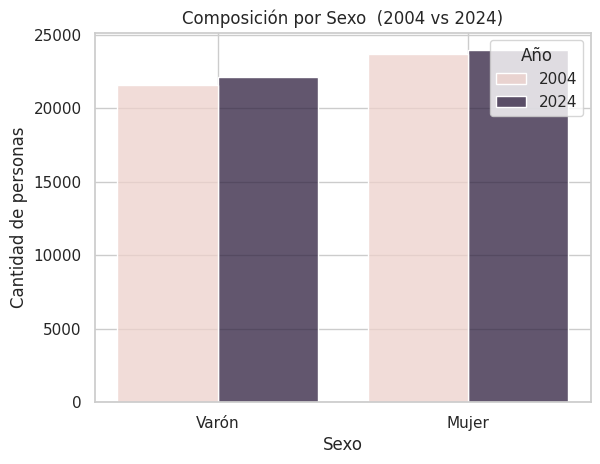

In [27]:
#punto 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_2004 = df_a.copy()
df_2024 = df_b.copy()
df_2004['Sexo'] = df_2004['ch04'].replace({1: 'Varón', 2: 'Mujer'})
df_2024['Sexo'] = df_2024['CH04'].replace({1: 'Varón', 2: 'Mujer'})
df_2004['Año'] = 2004
df_2024['Año'] = 2024
df_union = pd.concat([df_2004[['Sexo', 'Año']], df_2024[['Sexo', 'Año']]])
sns.set(style="whitegrid")
sns.histplot(data=df_union, x='Sexo', hue='Año', multiple='dodge', shrink=0.8, discrete=True)
plt.title("Composición por Sexo  (2004 vs 2024)")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de personas")
plt.show()


In [30]:
print(df_2004.columns)  # Ver nombres de columnas
print(df_2004["region"].unique())  # Ver qué valores hay
print(df_2004["region"].dtype)  # Ver el tipo (number o string)

Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr', 'pj1_1', 'pj2_1', 'pj3_1',
       'idimpp', 'Sexo', 'Año'],
      dtype='object', length=178)
['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patagónica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patagónica']
category


In [32]:
df_2004[df_2004["region"] == "Gran Buenos Aires"]  # Incorrecto si REGION es 1

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp,Sexo,Año
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,06,06,,04,0.0,0.0,0.0,00000,Varón,2004
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,00,,00,0.0,0.0,0.0,00000,Mujer,2004
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,07,,05,0.0,0.0,0.0,00020,Mujer,2004
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,08,,06,0.0,0.0,0.0,00000,Varón,2004
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,08,,06,0.0,0.0,0.0,00000,Mujer,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,288171,1.0,3.0,0.0,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,08,08,,09,0.0,0.0,0.0,00000,Mujer,2004
7643,288405,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,02,,02,0.0,0.0,0.0,00000,Varón,2004
7644,288405,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,02,,02,0.0,0.0,0.0,00000,Mujer,2004
7645,288405,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,02,,02,0.0,0.0,0.0,00000,Mujer,2004


In [34]:
df_2004[df_2004["region"] == 1]  # Correcto si REGION es numérica

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp,Sexo,Año


In [38]:
variables_corr = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Revisar qué columnas faltan
missing_cols = [col for col in variables_corr if col not in df_2004_gba.columns]
print("Columnas faltantes:", missing_cols)

Columnas faltantes: ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']


In [64]:
print(df_2004_gba.shape)

(0, 176)


In [63]:
print(df_2004_gba.columns.tolist())

['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', '

In [65]:
variables_corr = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

In [43]:
missing = [var for var in variables_corr if var not in df_2004_gba.columns]
print("Variables faltantes:", missing)

Variables faltantes: ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']


In [66]:
print(df_2004_gba.columns.tolist())

['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', '

In [67]:
# Mostrar todas las columnas disponibles en la base 2004 (Gran Buenos Aires)
for col in df_2004_gba.columns:
    print(col)

CODUSU
NRO_HOGAR
COMPONENTE
H15
ANO4
TRIMESTRE
REGION
MAS_500
AGLOMERADO
PONDERA
CH03
CH04
CH06
CH07
CH08
CH09
CH10
CH11
CH12
CH13
CH14
CH15
CH15_COD
CH16
CH16_COD
NIVEL_ED
ESTADO
CAT_OCUP
CAT_INAC
PP02C1
PP02C2
PP02C3
PP02C4
PP02C5
PP02C6
PP02C7
PP02C8
PP02E
PP02H
PP02I
PP03C
PP03D
PP3E_TOT
PP3F_TOT
PP03G
PP03H
PP03I
PP03J
INTENSI
PP04A
PP04B_COD
PP04B1
PP04B2
PP04B3_MES
PP04B3_ANO
PP04B3_DIA
PP04C
PP04C99
PP04D_COD
PP04G
PP05B2_MES
PP05B2_ANO
PP05B2_DIA
PP05C_1
PP05C_2
PP05C_3
PP05E
PP05F
PP05H
PP06A
PP06C
PP06D
PP06E
PP06H
PP07A
PP07C
PP07D
PP07E
PP07F1
PP07F2
PP07F3
PP07F4
PP07F5
PP07G1
PP07G2
PP07G3
PP07G4
PP07G_59
PP07H
PP07I
PP07J
PP07K
PP08D1
PP08D4
PP08F1
PP08F2
PP08J1
PP08J2
PP08J3
PP09A
PP09A_ESP
PP09B
PP09C
PP09C_ESP
PP10A
PP10C
PP10D
PP10E
PP11A
PP11B_COD
PP11B1
PP11B2_MES
PP11B2_ANO
PP11B2_DIA
PP11C
PP11C99
PP11D_COD
PP11G_ANO
PP11G_MES
PP11G_DIA
PP11L
PP11L1
PP11M
PP11N
PP11O
PP11P
PP11Q
PP11R
PP11S
PP11T
P21
DECOCUR
IDECOCUR
RDECOCUR
GDECOCUR
PDECOCUR
ADECOCUR
TOT_P12
P

In [68]:
df_2004.columns = df_2004.columns.str.upper()

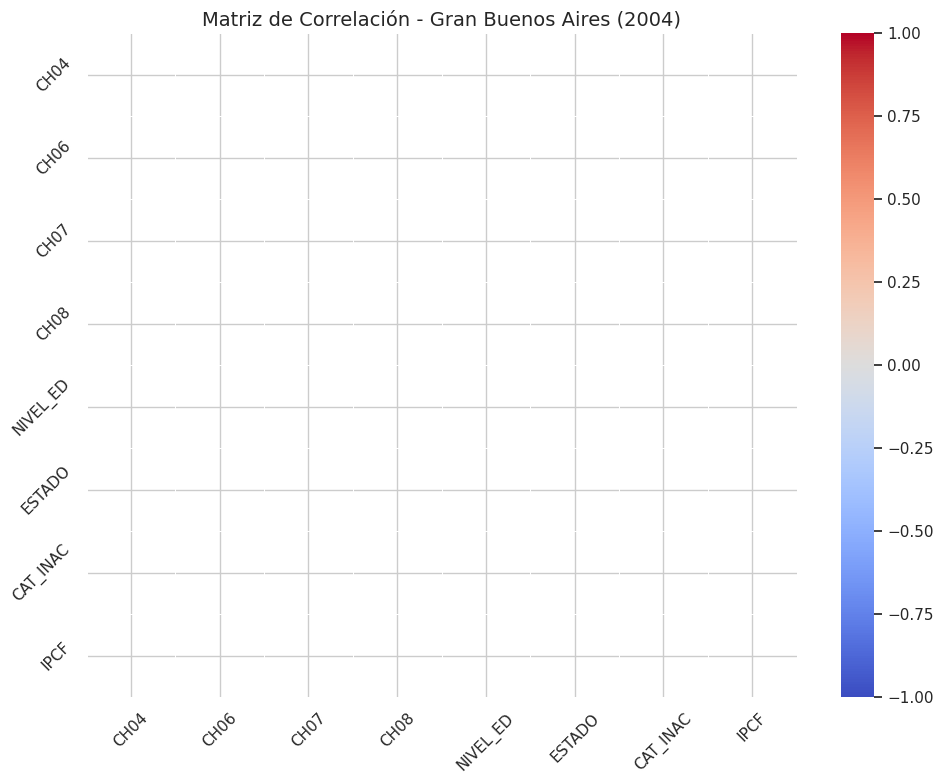

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Lista final confirmada de variables
variables_corr = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Filtrar solo Gran Buenos Aires (REGION = 1)
df_2004_gba = df_2004[df_2004["REGION"] == 1]

# Asegurarse de que las columnas estén en formato numérico
df_corr_2004 = df_2004_gba[variables_corr].apply(pd.to_numeric, errors='coerce')

# Matriz de correlación
corr_matrix_2004 = df_corr_2004.corr()

# Graficar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_2004, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación - Gran Buenos Aires (2004)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [70]:
# Ver cuántos valores no nulos hay en cada variable
df_corr_2004 = df_2004_gba[variables_corr].apply(pd.to_numeric, errors='coerce')
print("Cantidad de datos válidos por variable:")
print(df_corr_2004.notna().sum())

Cantidad de datos válidos por variable:
CH04        0
CH06        0
CH07        0
CH08        0
NIVEL_ED    0
ESTADO      0
CAT_INAC    0
IPCF        0
dtype: int64


In [73]:
for var in ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']:
    if var in df_2004.columns:
        print(f"\n--- {var} ---")
        print(df_2004[var].value_counts(dropna=False))
    else:
        print(f"\n{var} no existe en el DataFrame.")


--- CH04 ---
CH04
Mujer    23697
Varón    21592
Name: count, dtype: int64

--- CH06 ---
CH06
12.0             928
21.0             918
13.0             904
14.0             888
18.0             884
                ... 
98 y más años     14
94.0               6
95.0               6
96.0               3
97.0               2
Name: count, Length: 99, dtype: int64

--- CH07 ---
CH07
Soltero                  23993
Casado                   12810
Unido                     4441
Viudo                     2218
Separado o divorciado     1826
Ns./Nr.                      1
Name: count, dtype: int64

--- CH08 ---
CH08
Obra social (incluye PAMI)                                      20631
No paga ni le descuentan                                        19487
Mutual/Prepaga/Servicio de emergencia                            2824
Obra social y mutual/prepaga/servicio de emergencia              1776
Planes y seguros públicos                                         452
Ns./Nr.                              

In [78]:
df_2004['CH04'] = df_2004['CH04'].replace({'Varón': 1, 'Mujer': 2})
df_2004['ESTADO'] = df_2004['ESTADO'].replace({'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3})  # Add more replacements as needed

<ipython-input-78-84fa3e5dcdbe>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_2004['CH04'] = df_2004['CH04'].replace({'Varón': 1, 'Mujer': 2})
<ipython-input-78-84fa3e5dcdbe>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_2004['ESTADO'] = df_2004['ESTADO'].replace({'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3})  # Add more replacements as needed


In [79]:
variables_corr_numericas = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'IPCF']  # Assuming these are now numerical
df_corr = df_2004[variables_corr_numericas].apply(pd.to_numeric, errors='coerce')
corr_matrix = df_corr.corr()  # Calculate correlation

In [80]:
df_test = df_2004[df_2004["REGION"] == 1]

# Mostramos valores únicos de cada variable para ver si hay algo aprovechable
for var in ['CH04', 'CH06', 'ESTADO', 'IPCF']:
    print(f"\n--- {var} ---")
    print(df_test[var].value_counts(dropna=False))


--- CH04 ---
CH04
1    0
2    0
Name: count, dtype: int64

--- CH06 ---
CH06
Menos de 1 año    0
1.0               0
2.0               0
3.0               0
4.0               0
                 ..
94.0              0
95.0              0
96.0              0
97.0              0
98 y más años     0
Name: count, Length: 99, dtype: int64

--- ESTADO ---
ESTADO
Entrevista individual no realizada (no respuesta al cuestion    0
1                                                               0
2                                                               0
3                                                               0
Menor de 10 años                                                0
Name: count, dtype: int64

--- IPCF ---
Series([], Name: count, dtype: int64)


In [75]:
df_2004 = pd.read_stata("Individual_t104.dta")
df_2004.columns = df_2004.columns.str.upper()

In [76]:
df_gba = df_2004[df_2004["REGION"] == 1].copy()

In [77]:
print(df_gba["CH04"].value_counts(dropna=False))
print(df_gba["CH06"].value_counts(dropna=False))
print(df_gba["ESTADO"].value_counts(dropna=False))
print(df_gba["IPCF"].value_counts(dropna=False))

CH04
Varón    0
Mujer    0
Name: count, dtype: int64
CH06
Menos de 1 año    0
1.0               0
2.0               0
3.0               0
4.0               0
                 ..
94.0              0
95.0              0
96.0              0
97.0              0
98 y más años     0
Name: count, Length: 99, dtype: int64
ESTADO
Entrevista individual no realizada (no respuesta al cuestion    0
Ocupado                                                         0
Desocupado                                                      0
Inactivo                                                        0
Menor de 10 años                                                0
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


In [82]:
# --- PUNTO 4: Matriz de correlación para 2004 y 2024 ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
# Estandarizo nombres de columnas a mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

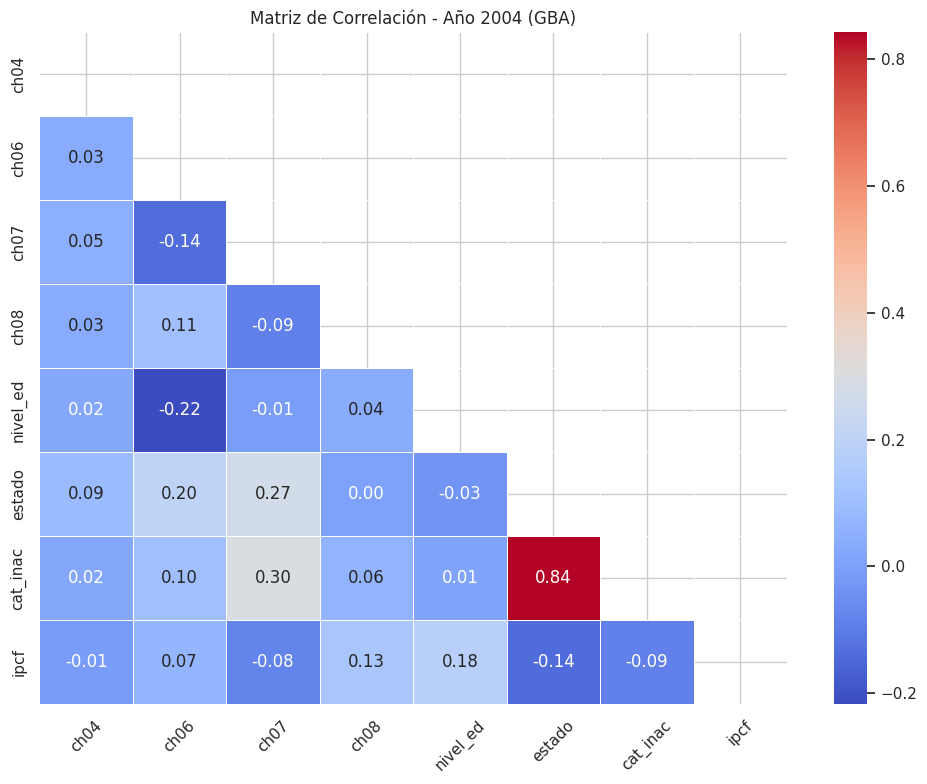

In [97]:
# Librerías
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Unificar nombres en minúscula
df_2004.columns = df_2004.columns.str.lower()
df_2024.columns = df_2024.columns.str.lower()

# Variables de interés
variables = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# Asegurarse de que todas estén en los datasets
df_2004_corr = df_2004[variables].copy()
df_2024_corr = df_2024[variables].copy()

# Codificar todas las columnas menos ingreso
encoder = LabelEncoder()

for col in variables:
    if col != 'ipcf':
        df_2004_corr[col] = encoder.fit_transform(df_2004_corr[col].astype(str))
        df_2024_corr[col] = encoder.fit_transform(df_2024_corr[col].astype(str))
    else:
        df_2004_corr[col] = pd.to_numeric(df_2004_corr[col], errors='coerce')
        df_2024_corr[col] = pd.to_numeric(df_2024_corr[col], errors='coerce')

# Correlaciones
corr_2004 = df_2004_corr.corr()
corr_2024 = df_2024_corr.corr()

# Máscara para mostrar solo la mitad inferior de la matriz
mask = np.triu(np.ones_like(corr_2004, dtype=bool))

# Gráfico 2004
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2004, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación - Año 2004 (GBA)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



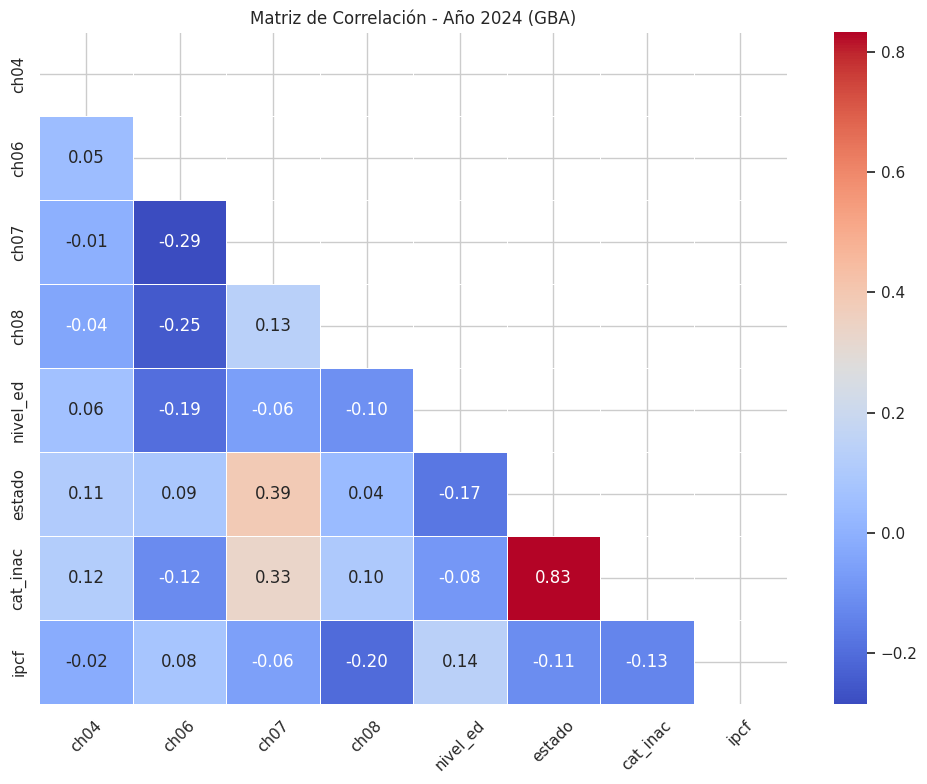

In [91]:
# Gráfico 2024
mask = np.triu(np.ones_like(corr_2024, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2024, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación - Año 2024 (GBA)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [107]:
#Punto5
#Desocupados e inactivos
# Asegurarnos que los nombres de columnas estén en mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

In [111]:
# Filtro para la población desocupada (estado == 2)
desocupados_2004 = df_2004[(df_2004['estado'] == 2) & (df_2004['aglomerado'] == 32)]
desocupados_2024 = df_2024[(df_2024['estado'] == 2) & (df_2024['AGLOMERADO'] == 32)]

# Distribución de nivel educativo
edu_2004 = desocupados_2004['nivel_ed'].value_counts(normalize=True) * 100
edu_2024 = desocupados_2024['nivel_ed'].value_counts(normalize=True) * 100

# Gráfico comparativo
plt.figure(figsize=(10,5))
edu_df = pd.DataFrame({'2004': edu_2004, '2024': edu_2024}).fillna(0)
edu_df.plot(kind='bar', figsize=(12,6))
plt.title("Distribución del Nivel Educativo entre Desocupados (GBA)")
plt.ylabel("Porcentaje")
plt.xlabel("Nivel Educativo")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


KeyError: 'estado'

In [112]:
# --- PUNTO 5: Análisis de desocupados e inactivos
# Asegurarnos que los nombres de columnas estén en mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

In [113]:
# ---- Para año 2004 ----

# Cantidad de desocupados e inactivos
cantidad_desocupados_2004 = df_2004[df_2004['ESTADO'] == 2].shape[0]
cantidad_inactivos_2004 = df_2004[df_2004['ESTADO'] == 3].shape[0]

print(f"Año 2004:")
print(f"Cantidad de desocupados: {cantidad_desocupados_2004}")
print(f"Cantidad de inactivos: {cantidad_inactivos_2004}")

# Media de ingreso per cápita familiar por estado
media_ingreso_2004 = df_2004.groupby('ESTADO', observed=True)['IPCF'].mean()
print("\nMedia de IPCF por estado (2004):")
print(media_ingreso_2004)

Año 2004:
Cantidad de desocupados: 2717
Cantidad de inactivos: 17700

Media de IPCF por estado (2004):
ESTADO
Entrevista individual no realizada (no respuesta al cuestion    107.955782
1                                                               368.184033
2                                                               187.322422
3                                                               265.826881
Menor de 10 años                                                196.084341
Name: IPCF, dtype: float64


In [115]:
# ---- Para año 2024 ----

# Cantidad de desocupados e inactivos
cantidad_desocupados_2024 = df_2024[df_2024['ESTADO'] == 2].shape[0]
cantidad_inactivos_2024 = df_2024[df_2024['ESTADO'] == 3].shape[0]

print(f"\nAño 2024:")
print(f"Cantidad de desocupados: {cantidad_desocupados_2024}")
print(f"Cantidad de inactivos: {cantidad_inactivos_2024}")

# Media de ingreso per cápita familiar por estado
media_ingreso_2024 = df_2024.groupby('ESTADO')['IPCF'].mean()
print("\nMedia de IPCF por estado (2024):")
print(media_ingreso_2024)


Año 2024:
Cantidad de desocupados: 1362
Cantidad de inactivos: 18724

Media de IPCF por estado (2024):
ESTADO
0         0.000000
1    189935.804812
2     97985.469567
3    141970.998369
4    114414.638143
Name: IPCF, dtype: float64


In [117]:
#Punto6

In [118]:
# Aseguramos columnas en mayúsculas
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

In [119]:
# Año 2004

#Quién respondío.
respondieron_2004 = df_2004[df_2004['ESTADO'] != 0]
norespondieron_2004 = df_2004[df_2004['ESTADO'] == 0]

# Cantidad/Cuántos
print(f"Año 2004:")
print(f"Cantidad de personas que NO respondieron condición de actividad: {norespondieron_2004.shape[0]}")
print(f"Cantidad de personas que respondieron: {respondieron_2004.shape[0]}")

Año 2004:
Cantidad de personas que NO respondieron condición de actividad: 0
Cantidad de personas que respondieron: 45289


In [120]:
#2024
#Respondieron
respondieron_2024 = df_2024[df_2024['ESTADO'] != 0]
norespondieron_2024 = df_2024[df_2024['ESTADO'] == 0]

# Cantidad
print(f"\nAño 2024:")
print(f"Cantidad de personas que NO respondieron condición de actividad: {norespondieron_2024.shape[0]}")
print(f"Cantidad de personas que respondieron: {respondieron_2024.shape[0]}")


Año 2024:
Cantidad de personas que NO respondieron condición de actividad: 81
Cantidad de personas que respondieron: 45969


In [121]:
# Punto 7
respondieron_2024 = df_2024[df_2024['ESTADO'] != 0]
norespondieron_2024 = df_2024[df_2024['ESTADO'] == 0]

#Agregamos la columna PEA
# Para 2004
respondieron_2004["PEA"] = respondieron_2004["ESTADO"].apply(lambda x: 1 if x in [1, 2] else 0)
# Para 2024
respondieron_2024["PEA"] = respondieron_2024["ESTADO"].apply(lambda x: 1 if x in [1, 2] else 0)

<ipython-input-121-7aa5407b7121>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron_2024["PEA"] = respondieron_2024["ESTADO"].apply(lambda x: 1 if x in [1, 2] else 0)


In [122]:
import matplotlib.pyplot as plt

# Contar cuántos están o no en la PEA en cada año
pea_2004 = respondieron_2004["PEA"].value_counts().sort_index()
pea_2024 = respondieron_2024["PEA"].value_counts().sort_index()

print(pea_2004)
print(pea_2024)


PEA
0    25550
1    19739
Name: count, dtype: int64
PEA
0    24282
1    21687
Name: count, dtype: int64


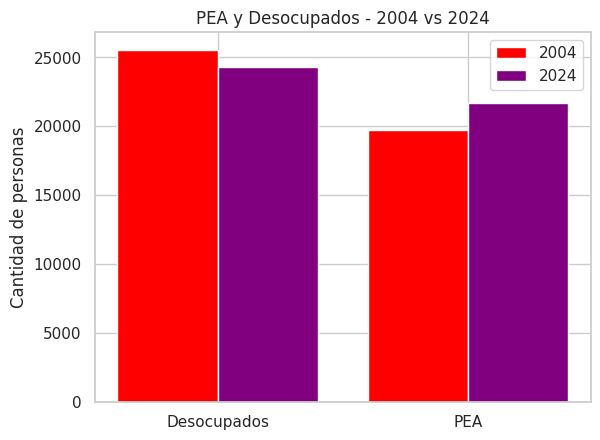

In [123]:
# Etiquetamos
labels = ["Desocupados", "PEA"]
x = [0, 1]

# Crear gráfico de barras
fig, ax = plt.subplots()
ax.bar([i - 0.2 for i in x], pea_2004, width=0.4, label="2004", color="red")
ax.bar([i + 0.2 for i in x], pea_2024, width=0.4, label="2024", color="purple")

# Decorar
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Cantidad de personas")
ax.set_title("PEA y Desocupados - 2004 vs 2024")
ax.legend()

plt.show()

In [126]:
# Punto 8

# Convertimos la columna de edad a numérica
respondieron_2004["H15"] = pd.to_numeric(respondieron_2004["H15"], errors="coerce")
respondieron_2024["H15"] = pd.to_numeric(respondieron_2024["H15"], errors="coerce")

# Añadimos la columna PET: 1= entre 15 y 65, 0= cualquier otro
respondieron_2024.loc[:, "H15"] = pd.to_numeric(respondieron_2024["H15"], errors="coerce")
respondieron_2024.loc[:, "PET"] = respondieron_2024["H15"].apply(lambda x: 1 if 15 <= x <= 65 else 0)

<ipython-input-126-e542d948e66f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron_2024["H15"] = pd.to_numeric(respondieron_2024["H15"], errors="coerce")
